## Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 1. Data 불러오기

In [2]:
data=pd.read_csv("winequality-red.csv")

### 1-1. train set과 test set 분리

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target='quality'

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(data[features],data[target],shuffle=True)

In [7]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1396,8.7,0.675,0.10,1.6,0.090,4.0,11.0,0.99745,3.31,0.65,9.55
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.40
932,7.6,0.400,0.29,1.9,0.078,29.0,66.0,0.99710,3.45,0.59,9.50
1309,7.0,0.620,0.10,1.4,0.071,27.0,63.0,0.99600,3.28,0.61,9.20
601,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.00
...,...,...,...,...,...,...,...,...,...,...,...
1050,7.1,0.430,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.40
1016,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.60
1458,8.4,0.290,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.50
918,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.00


## 2. Data EDA

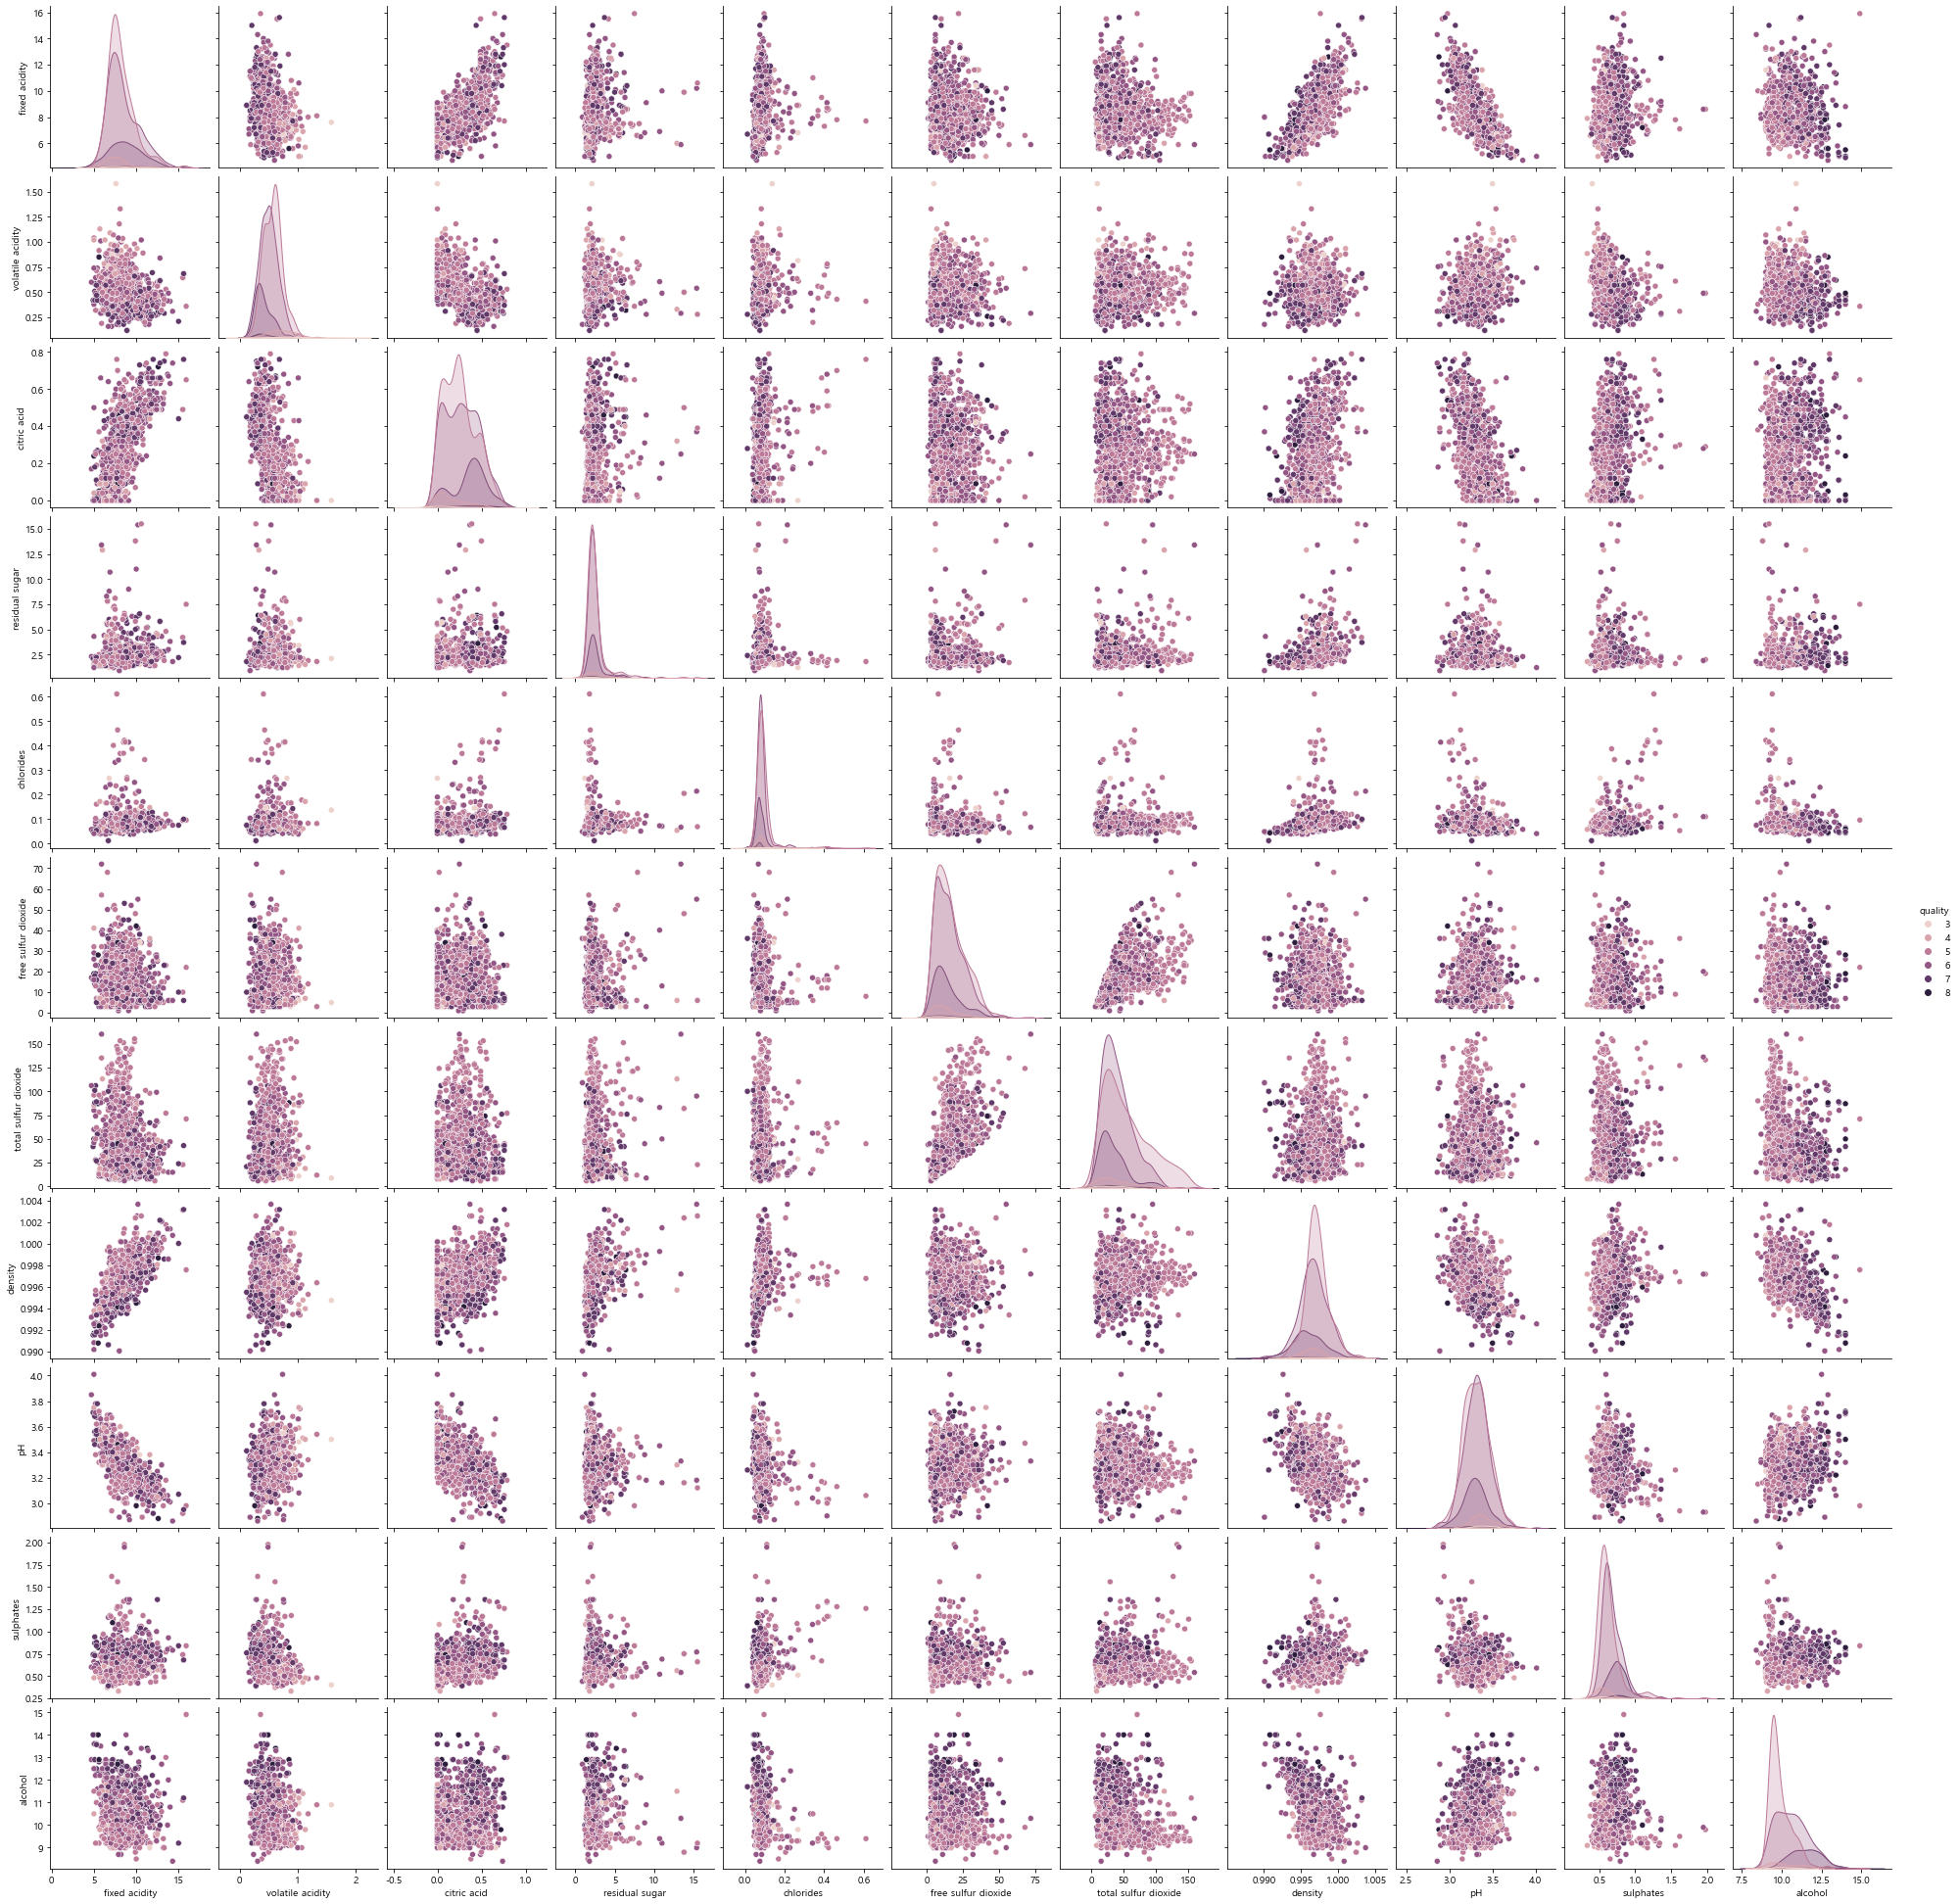

In [8]:
temp=pd.concat([X_train,Y_train],axis=1)
sns.pairplot(temp,hue='quality')

<AxesSubplot:>

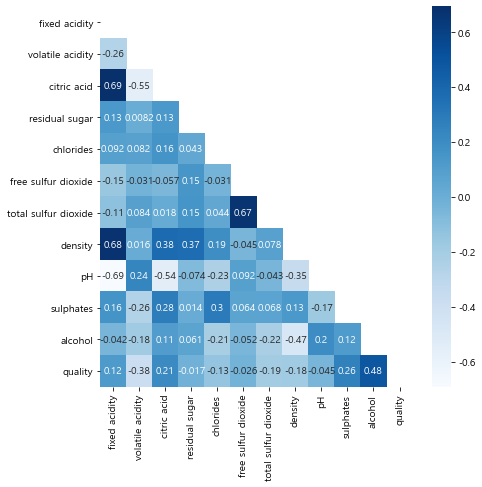

In [9]:
mask=np.zeros_like(temp.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(7,7))
sns.heatmap(temp.corr(),annot=True,mask=mask,cmap='Blues')

<li><strong>quality & volatile acidity</strong></li>
<li><strong>quality & alcohol</strong></li>
<li>alcohol & density</li>
<li>pH & fixed acidity</li>
<li>pH & citric acid</li>
<li>density & fixed acidity</li>
<li>total sulfur dioxide & free sulfur dioxide</li>
<li>citric acid & fixed acidity</li>
이 상관관계가 있다

<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>

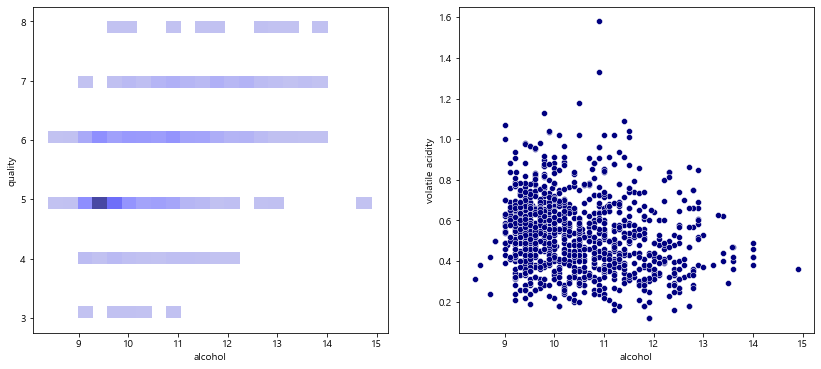

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.histplot(data=temp,x='alcohol',y='quality',color='navy')
plt.subplot(122)
sns.scatterplot(data=temp,x='alcohol',y='volatile acidity',color='navy')

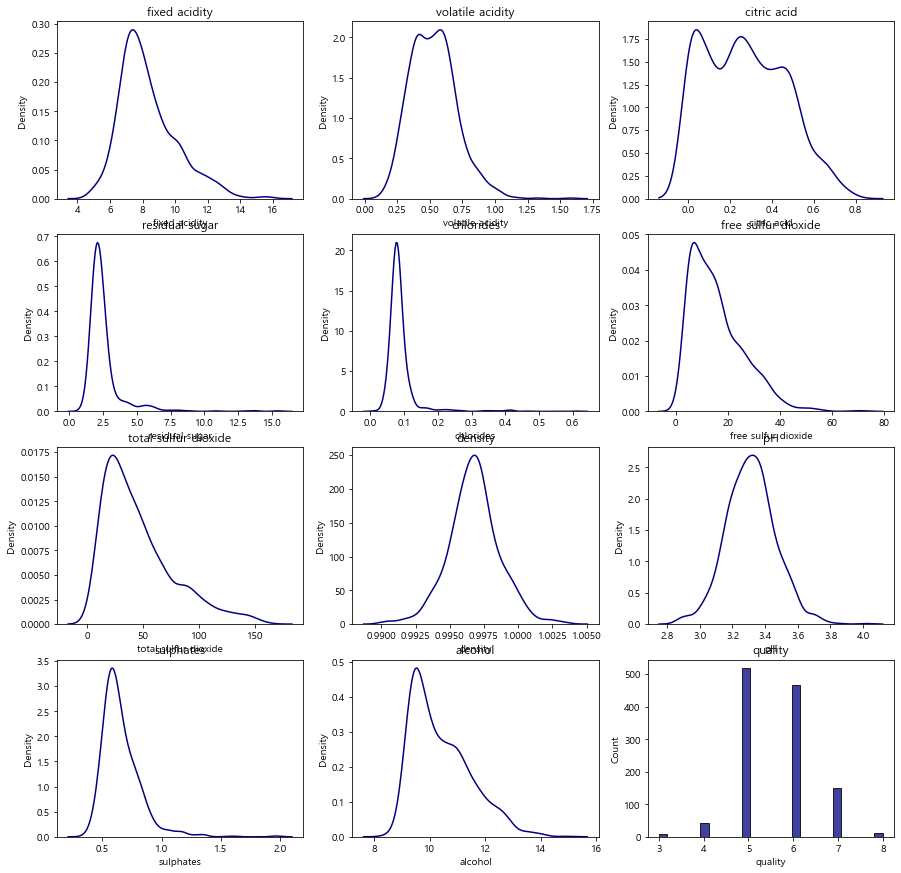

In [11]:
plt.figure(figsize=(15,15))
for i in range (0,len(temp.columns)):
    plt.subplot(4,3,i+1)
    plt.title('{0}'.format(temp.columns[i]))
    if i == 11 :
        sns.histplot(temp['{0}'.format(temp.columns[i])],color='navy')
    else:
        sns.kdeplot(temp['{0}'.format(temp.columns[i])],color='navy')

In [12]:
temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.323103,0.528082,0.270884,2.518015,0.087244,15.730192,45.922435,0.996776,3.313094,0.656647,10.416972,5.626355
std,1.753473,0.177943,0.192499,1.361167,0.044494,10.216029,31.383058,0.001881,0.151353,0.164204,1.063909,0.812366
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995680,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.420000,2.600000,0.091000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,160.000000,1.003690,4.010000,1.980000,14.900000,8.000000


free sulfur dioxide와 total sulfur dioxide는 outlier 갖고 있기 때문에 RobustScaler를 사용한다.<br>
분류 작업이기 때문에 StandardScaler를 사용한다.

## 3. Data 전처리

### 결측치 확인

In [13]:
X_train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [14]:
X_test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [15]:
rs=RobustScaler()
ss=StandardScaler()

### Feature Scaling - Robust Scaling

In [16]:
X_Robust_train=X_train.copy()
X_Robust_test=X_test.copy()
for i in range(0,len(X_train.columns)):
    X_Robust_train['{0}'.format(X_train.columns[i])]=rs.fit_transform(X_Robust_train['{0}'.format(X_train.columns[i])
                                                                                     ].to_frame(name=('{0}'.format(X_train.columns[i]))))
    X_Robust_test['{0}'.format(X_test.columns[i])]=rs.fit_transform(X_Robust_test['{0}'.format(X_test.columns[i])
                                                                                 ].to_frame(name=('{0}').format(X_test.columns[i])))

## 4. 모델 선택 및 훈련 - Logistic Regression

In [17]:
lr=LogisticRegression()

In [18]:
lr.fit(X_Robust_train,Y_train)

C:\Users\suyeo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
Robust_result=lr.predict(X_Robust_test)

In [20]:
accuracy_score(Y_test,Robust_result)

0.6125

## 4-1. 모델 선택 및 훈련 - Logistic Regression without Robust Scaling

In [21]:
lr.fit(X_train,Y_train)

C:\Users\suyeo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
result=lr.predict(X_test)

In [23]:
accuracy_score(Y_test,result)

0.5925

Scaling을 한 것이 더 높은 것을 알 수 있다.

## 3-2. 데이터 전처리 - Standard Scaler

In [24]:
X_Standard_train=X_train.copy()
X_Standard_test=X_test.copy()
for i in range(0,len(X_train.columns)):
    X_Standard_train['{0}'.format(X_train.columns[i])]=ss.fit_transform(X_Standard_train['{0}'.format(X_train.columns[i])
                                                                                     ].to_frame(name=('{0}'.format(X_train.columns[i]))))
    X_Standard_test['{0}'.format(X_test.columns[i])]=ss.fit_transform(X_Standard_test['{0}'.format(X_test.columns[i])
                                                                                 ].to_frame(name=('{0}').format(X_test.columns[i])))

## 4-3. 모델 선택 및 훈련 - Logistic Regression with Standard Scaler 

In [25]:
lr.fit(X_Standard_train,Y_train)

LogisticRegression()

In [26]:
Standard_result=lr.predict(X_test)

In [27]:
accuracy_score(Y_test,Standard_result)

0.46

outlier가 존재하여 StandardScaler의 성능이 떨어짐을 알수있다.

## 4-4. 모델 선택 및 훈련 - Perceptron with Robust Scaler

In [28]:
pt=Perceptron()

In [29]:
pt.fit(X_Robust_train,Y_train)

Perceptron()

In [30]:
pt_result=pt.predict(X_Robust_test)

In [31]:
accuracy_score(Y_test,pt_result)

0.475

## 4-5. 모델 선택 및 훈련 - Perceptron with Standard Scaler

In [32]:
pt.fit(X_Standard_train,Y_train)

Perceptron()

In [33]:
pt_s_result=pt.predict(X_Standard_test)

In [34]:
accuracy_score(Y_test,pt_result)

0.475

## 4-6. 모델 선택 및 훈련 - DecisionTreeClassifier without Scaler

In [35]:
dtc=DecisionTreeClassifier()

In [36]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
dtc_result=dtc.predict(X_test)

In [38]:
accuracy_score(Y_test,dtc_result)

0.6225

## 4-7. 모델 선택 및 훈련 - LightGBM without scaling

LightGBM은 Tree 모델이라 scaling이 필요없다.

In [39]:
lgb=LGBMClassifier()

In [40]:
lgb.fit(X_train,Y_train)

LGBMClassifier()

In [41]:
lgb_result=lgb.predict(X_test)

In [42]:
accuracy_score(Y_test,lgb_result)

0.6975

LightGBM 모델로 하였을 때 가장 좋은 결과가 나왔다.

## 5. 모델 조정

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

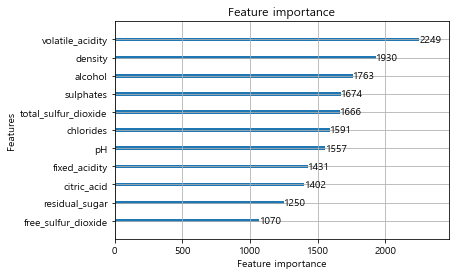

In [43]:
plot_importance(lgb)

volatile_acidity가 가장 중요한 feature였다.

### 5-1. 변수 조정

가장 하위 importance를 갖은 residual sugar, free sulfur dioxide, pH를 제거한다

In [44]:
new_features=['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

In [45]:
X_train_new=X_train[new_features]
X_test_new=X_test[new_features]

In [46]:
lgb.fit(X_train_new,Y_train)

LGBMClassifier()

In [47]:
lgb_result_1=lgb.predict(X_test_new)

In [48]:
accuracy_score(Y_test,lgb_result_1)

0.6925

더 낮은 결과값이 나왔다.

### 5-2. Parameter 변경

LGBMClassifier의 parameter중 n_estimators는 반복 수행 트리개수를 지정한다.<br>
<li>수치가 너무 크면 overfitting이 발생한다</li>
learning_rate는 Boosting learning rate

In [73]:
lgb_2=LGBMClassifier(learning_rate=0.3)

In [74]:
lgb_2.fit(X_train,Y_train)

LGBMClassifier(learning_rate=0.3)

In [75]:
result2=lgb_2.predict(X_test)

In [76]:
accuracy_score(Y_test,result2)

0.705

GridSearchCV를 사용하는 것이 편하다